In [131]:
import requests
from requests import get
#from bs4 import BeautifulSoup
import urllib
import pandas as pd
import numpy as np
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time 
from random import randint
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
import base64, io
from PIL import Image
from io import BytesIO
from urllib.request import urlopen
from binascii import a2b_base64
from selenium.common.exceptions import StaleElementReferenceException

In [59]:
headers = {"Accept-Language": "en-US, en;q=0.5"}
opts = Options()
opts.headless = False
driver = webdriver.Chrome(ChromeDriverManager().install(),options=opts)



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\yfird\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


In [133]:
page=1
while page!=51:
    url="https://www.jumia.com.ng/food-cupboard-supplies/?page={}#catalog-listing".format(page)
    attempt = 1
    max_attempts=3
    try:
        driver.get(url)
        #driver.find_element_by_tag_name('html').send_keys(Keys.END)
    except TimeoutException as ex:
        print(ex.Message)
        driver.navigate().refresh()
     
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")#scrolls through page to ensure pge loads before scraping
    WebDriverWait(driver,5)
    try:  
        products= WebDriverWait(driver,30).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"article.prd._fb.col.c-prd")))
        for p in products:
            if p is not None:
                file_name=p.find_element_by_tag_name('h3').text.replace('/','-').strip()
                specialChars = '!#"$:[]$@%^&*()'
                for specialChar in specialChars:
                    file_name=file_name.replace(specialChar, '')
            else:
                file_name=None
            print (file_name)
            if p is not None:
                img = p.find_element_by_tag_name("img")
                img_src= img.get_attribute("src")
            else:
                img_src=None
            print(img_src)
            im = Image.open(io.BytesIO(base64.b64decode(img_src.split(',')[1])))
            #im.save(file_name + '.jpg')
            #im=img_src
            if im.mode == "JPEG":
                im.save(file_name + '.jpg')
                # in most case, resulting jpg file is resized small one
            elif im.mode in ["RGBA", "P"]:
                rgb_im = im.convert("RGB")
                rgb_im.save(file_name + '.jpg')
            #urllib.request.urlretrieve(img_src, file_name + '.png')
    except StaleElementReferenceException:
        if attempt == max_attempts:
                raise
        attempt += 1
 
    #base64_string =img_src # that monster you saw above
   # s=('GET ' + img_src + ' HTTP/1.0\r\n\r\n')
    #decoded_string = base64.b64decode(s)
   # decoded_string.save('file_name', 'JPEG')
    page=page+1    
    
    

WebDriverException: Message: chrome not reachable
  (Session info: chrome=91.0.4472.124)


In [118]:
im = Image.open("Beijing Meidan Butter Cracker Milk Flavor.jpg")

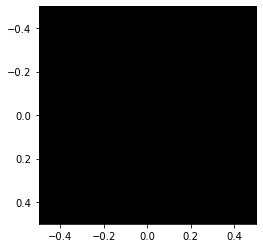

In [121]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
im = Image.open("Beijing Meidan Butter Cracker Milk Flavor.jpg")
imshow(np.asarray(im))

  string = img_src.split('base64,')[1]
            decoded = base64.decodebytes(string.encode("ascii"))
            im = base64.b64decode(decoded+ b'==')
            #im.save(file_name, 'JPEG')
            with open(file_name, "wb") as f:
                m= f.write(im)